# Tests Using Real Dataset

<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook Setup</a></span></li><li><span><a href="#Using-the-Model-Modules" data-toc-modified-id="Using-the-Model-Modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using the Model Modules</a></span></li></ul></div>

## Notebook Setup

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import nltk
from sklearn import metrics
from time import time
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

import sys
sys.path.append("..\src")

from models.text_models import text_cluster_model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DanielBrugnaroDeMora\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DanielBrugnaroDeMora\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DanielBrugnaroDeMora\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DanielBrugnaroDeMora\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Initial setting
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_colwidth = 100
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../data/processed/data.csv", sep=";")
df = df[df['input'].notna()]

In [4]:
df

,id,correlationId,conversationId,output,input,createdAt,x_input
0,62e43eda17f36dd1505cdfdb,43fd0615-5831-4d66-b521-5113c02d24e5,00075035-4ad7-40a3-a38a-6b14f09b0d6c,Poderia perguntar de um outro jeito?,Lavouras,2022-07-29 20:11:06.283,lavoura
1,6328c4eafd02d23f0c8a7be2,c7c84a5b-99e8-4fcd-bff1-c946ce6bc605,00d77e76-8fbd-4ba6-a786-6afe010a9c2e,Poderia perguntar de um outro jeito?,O banco aceita casa como garantia?,2022-09-19 19:37:14.208,banco aceitar casa garantia
2,6328c4eafd02d293bc8a7be3,c7c84a5b-99e8-4fcd-bff1-c946ce6bc605,00d77e76-8fbd-4ba6-a786-6afe010a9c2e,Poderia perguntar de um outro jeito?,O banco aceita casa como garantia?,2022-09-19 19:37:14.211,banco aceitar casa garantia
3,6328c51cfd02d23bca8a7beb,c7c84a5b-99e8-4fcd-bff1-c946ce6bc605,00d77e76-8fbd-4ba6-a786-6afe010a9c2e,Poderia perguntar de um outro jeito?,O banco aceita alienação?,2022-09-19 19:38:04.870,banco aceitar alienacao
4,6328c51cfd02d278ee8a7bec,c7c84a5b-99e8-4fcd-bff1-c946ce6bc605,00d77e76-8fbd-4ba6-a786-6afe010a9c2e,Poderia perguntar de um outro jeito?,O banco aceita alienação?,2022-09-19 19:38:04.874,banco aceitar alienacao
...,...,...,...,...,...,...,...
1857,630e6a4f76b21bb63f3440a2,NaN,ffa362d2-f821-4593-a3ac-faae10674333,Poderia perguntar de um outro jeito?,Custeio,2022-08-30 19:51:43.166,custeio
1858,630e6a4f76b21bb63f3440a3,NaN,ffa362d2-f821-4593-a3ac-faae10674333,Poderia perguntar de um outro jeito?,Custeio,2022-08-30 19:51:43.170,custeio
1859,630e6a4f76b21bb63f3440a5,NaN,ffa362d2-f821-4593-a3ac-faae10674333,Poderia perguntar de um outro jeito?,Custeio,2022-08-30 19:51:43.777,custeio
1860,635acdcc6af97a2ec72e5b48,929a94bf-6b67-4f96-aeb5-ec95a0ee5395,ffba97c6-a211-4d41-a079-c50f56a76343,Poderia perguntar de um outro jeito?,Quais são os produtos disponíveis na plataforma?,2022-10-27 18:28:28.555,qual produto disponivel plataforma


In [5]:
dataset = df["x_input"].astype(str).to_list()

## Using the Model Modules

In [6]:
modeller = text_cluster_model(dataset, True)

In [7]:
features, vectorizer = modeller.extract_features()

2023-02-13 15:21:19,406 - models.text_models - INFO - vectorization done in 0.013 s
2023-02-13 15:21:19,406 - models.text_models - INFO - n_samples: 1633, n_features: 155
2023-02-13 15:21:19,406 - models.text_models - INFO - We find that around 1.13% of the entries of the X_tfidf matrix are non-zero


..\src\models\text_models.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.__plot_lsa__(svd).show()


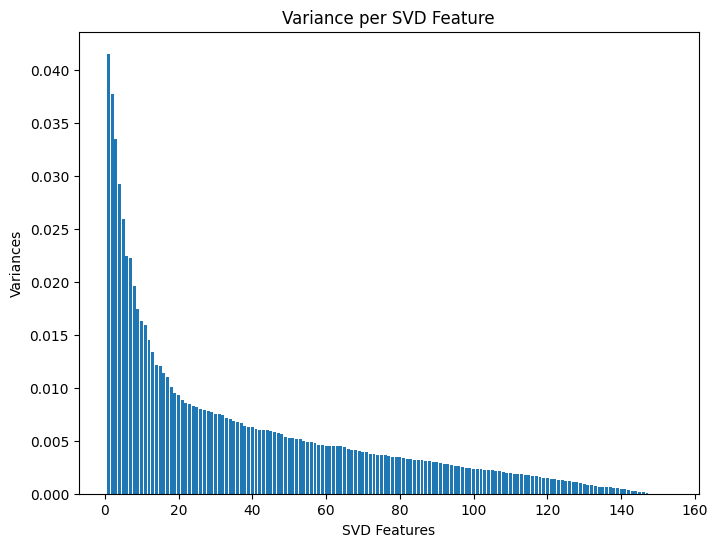

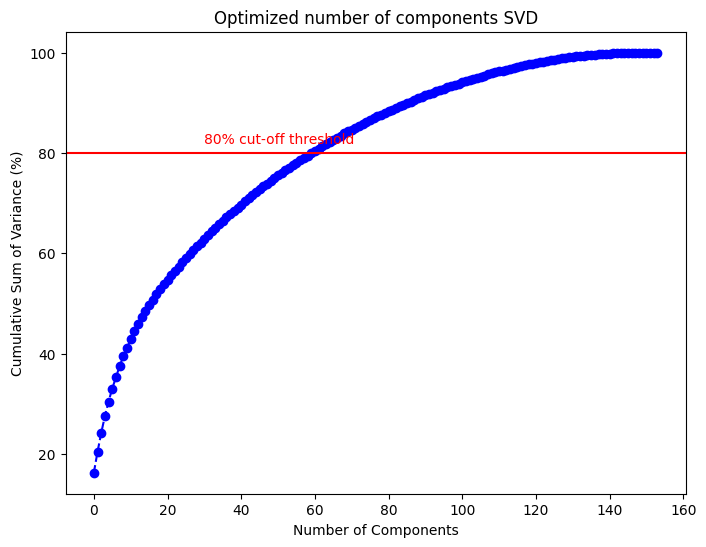

In [8]:
reduced_features, tsvd_var_ratios = modeller.reduce_dimensions(features)

In [9]:
x_lsa, lsa = modeller.optimize_components_number(reduced_features, tsvd_var_ratios, .8)

2023-02-13 15:21:20,304 - models.text_models - INFO - Optimized number of components: 61
2023-02-13 15:21:20,379 - models.text_models - INFO - LSA done in 0.073 s
2023-02-13 15:21:20,379 - models.text_models - INFO - Explained variance of the SVD step: 80.3%


In [10]:
type(lsa)

sklearn.pipeline.Pipeline

..\src\models\text_models.py:302: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.__plot_elbow__(ks, inertias).show()
..\src\models\text_models.py:305: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.__plot_silhouette__(df_ss['n_cluster'], df_ss['ss_indexes']).show()


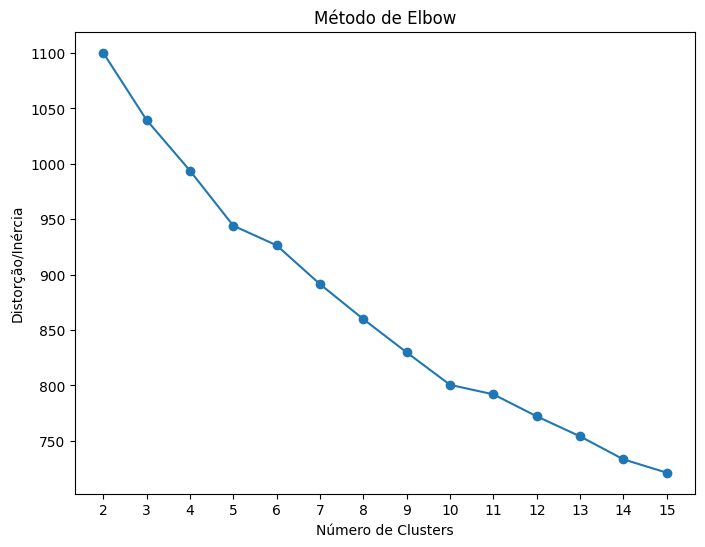

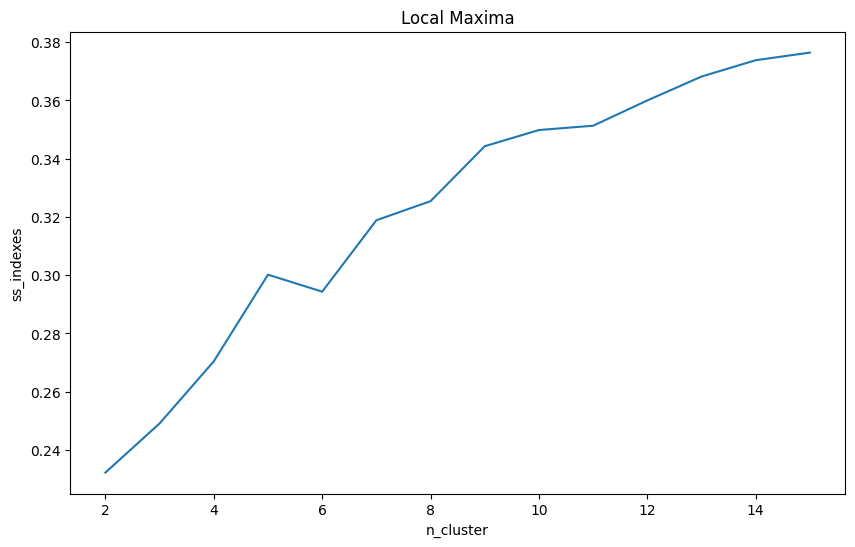

In [11]:
n_cluster = modeller.optimize_clusters_number(x_lsa)

In [12]:
kmeans = modeller.cluster_texts(x_lsa, 7, lsa, vectorizer)

Cluster 0: custeio limite fazer prazo qual querer agricola pronamp pecuario poder 

Cluster 1: credito rural prazo conseguir obter livre saber contratar sobre limite 

Cluster 2: testir linha conseguir car documento documentacao obter prazo embargo financiamento 

Cluster 3: poder cpr contratar querer documento qual sobre fazer prazo valor 

Cluster 4: investimento pecuario prazo custeio taxa pronamp qual car suinoculturo contratacao 

Cluster 5: linha creditar testir bom bem credito ai embargo pagamento financiamento 

Cluster 6: avaliacao propriedade validade sobre legal fazer reserva prazo responsavel saber 



In [13]:
df_output = modeller.format_results(df, x_lsa, kmeans)

In [14]:
df_output

,id,correlationId,conversationId,output,input,createdAt,x_input,predict
0,62e43eda17f36dd1505cdfdb,43fd0615-5831-4d66-b521-5113c02d24e5,00075035-4ad7-40a3-a38a-6b14f09b0d6c,Poderia perguntar de um outro jeito?,Lavouras,2022-07-29 20:11:06.283,lavoura,3
1,6328c4eafd02d23f0c8a7be2,c7c84a5b-99e8-4fcd-bff1-c946ce6bc605,00d77e76-8fbd-4ba6-a786-6afe010a9c2e,Poderia perguntar de um outro jeito?,O banco aceita casa como garantia?,2022-09-19 19:37:14.208,banco aceitar casa garantia,3
2,6328c4eafd02d293bc8a7be3,c7c84a5b-99e8-4fcd-bff1-c946ce6bc605,00d77e76-8fbd-4ba6-a786-6afe010a9c2e,Poderia perguntar de um outro jeito?,O banco aceita casa como garantia?,2022-09-19 19:37:14.211,banco aceitar casa garantia,3
3,6328c51cfd02d23bca8a7beb,c7c84a5b-99e8-4fcd-bff1-c946ce6bc605,00d77e76-8fbd-4ba6-a786-6afe010a9c2e,Poderia perguntar de um outro jeito?,O banco aceita alienação?,2022-09-19 19:38:04.870,banco aceitar alienacao,3
4,6328c51cfd02d278ee8a7bec,c7c84a5b-99e8-4fcd-bff1-c946ce6bc605,00d77e76-8fbd-4ba6-a786-6afe010a9c2e,Poderia perguntar de um outro jeito?,O banco aceita alienação?,2022-09-19 19:38:04.874,banco aceitar alienacao,3
...,...,...,...,...,...,...,...,...
1628,630e6a4f76b21bb63f3440a2,NaN,ffa362d2-f821-4593-a3ac-faae10674333,Poderia perguntar de um outro jeito?,Custeio,2022-08-30 19:51:43.166,custeio,0
1629,630e6a4f76b21bb63f3440a3,NaN,ffa362d2-f821-4593-a3ac-faae10674333,Poderia perguntar de um outro jeito?,Custeio,2022-08-30 19:51:43.170,custeio,0
1630,630e6a4f76b21bb63f3440a5,NaN,ffa362d2-f821-4593-a3ac-faae10674333,Poderia perguntar de um outro jeito?,Custeio,2022-08-30 19:51:43.777,custeio,0
1631,635acdcc6af97a2ec72e5b48,929a94bf-6b67-4f96-aeb5-ec95a0ee5395,ffba97c6-a211-4d41-a079-c50f56a76343,Poderia perguntar de um outro jeito?,Quais são os produtos disponíveis na plataforma?,2022-10-27 18:28:28.555,qual produto disponivel plataforma,3
